In [1]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/M-Awad23/Fantasy-Premier-League/refs/heads/master/data/2022-23/gws/merged_gw.csv")

In [2]:
features = df[['position', 'team', 'xP', 'assists', 'bonus', 'bps', 'clean_sheets', 
                'expected_goals', 'expected_assists', 'minutes', 'opponent_team', 'was_home']]

In [3]:
df['next_gw_points'] = df['total_points'].shift(-1)

df = df.dropna(subset=['next_gw_points'])

In [4]:
X = features.loc[df.index]
y = df['next_gw_points']

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X[['xP', 'assists', 'bonus', 'bps', 'clean_sheets', 'expected_goals', 'expected_assists', 'minutes']] = scaler.fit_transform(
    X[['xP', 'assists', 'bonus', 'bps', 'clean_sheets', 'expected_goals', 'expected_assists', 'minutes']]
)

In [6]:
X = pd.get_dummies(X, columns=['position', 'team', 'opponent_team'], drop_first=True)

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [13]:
from sklearn.metrics import mean_absolute_error, r2_score

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'R² Score: {r2}')

Mean Absolute Error: 1.628000906894615
R² Score: -0.1685068296595582


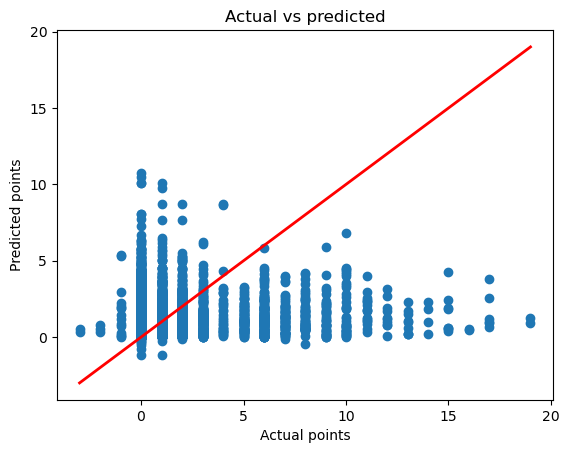

In [14]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual points")
plt.ylabel("Predicted points")
plt.title("Actual vs predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.show()
